## 1. Setup and Data Loading

In [1]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Load Data
df_contracts = pd.read_excel('fact_ipl_central_contracts.xlsx')
df_advertisers = pd.read_excel('fact_ipl_advertisers.xlsx')
df_demography = pd.read_excel('fact_summary_demography.xlsx')
df_revenue_demo = pd.read_excel('fact_revenue_demography.xlsx')

# Preview data
display(df_contracts)
display(df_advertisers)
display(df_demography)
display(df_revenue_demo)

,contract_type,partner_sponsor_name,amount_in_crores_2025,total_deal_value_in_crores,contract_duration
0,Title Sponsor,Tata Group,500.0,2500.0,5 Years (2024 - 2028)
1,Associate Partner,My11Circle,125.0,625.0,5 Years (2024 - 2028)
2,Associate Partner,Angel One,82.0,410.0,5 Years (2024 - 2028)
3,Associate Partner,RuPay,42.0,210.0,5 Years (2024 - 2028)
4,Official Broadcaster (TV),Star Sports,4715.0,23575.0,5 Years (2024 - 2028)
5,Official Digital Streaming Partner,JioCinema (Viacom18),4751.0,23758.0,5 Years (2024 - 2028)
6,Official Strategic Timeout Partner,CEAT,NaN,NaN,5 Years (2024 - 2028)
7,Official Umpire Partner,Wonder Cement,NaN,NaN,5 Years (2024 - 2028)
8,Official Orange & Purple Cap Partner,Aramco,NaN,NaN,5 Years (2024 - 2028)


,sno,advertiser_brand,category,brand_ambassadors,celebrity_influence,health_social_risk
0,1,Vishnu Packaging (Vimal Elaichi),Pan Masala/Mouth Freshener,"Shah Rukh Khan, Ajay Devgn, Akshay Kumar",Extremely High,Extremely High - Carcinogenic (Surrogate Ads)
1,2,Sporta Technologies (Dream11),Fantasy Gaming / Betting,"Rohit Sharma, Aamir Khan, Ranbir Kapoor, Varun...",Very High,Extremely High - Promotes Gambling
2,3,Reliance Consumer Products,FMCG / Beverages,multiple,Medium,Moderate (Sugar Content)
3,4,My11Circle,Fantasy Gaming / Betting,"Sourav Ganguly, Shubman Gill, Mohammed Siraj, ...",High,Extremely High - Promotes Gambling
4,5,Rajshree Silver Coated Elaichi,Pan Masala/Mouth Freshener,Salman Khan,Very High,Carcinogenic (Surrogate Ads)
5,6,Parle Biscuits,FMCG (Biscuits & Snacks),"Ananya Panday, Lakshya (Hide & Seek)",Moderate,Moderate (Sugar Content)
6,7,Kamla Pasand,Pan Masala/Mouth Freshener,"Virender Sehwag, Sunil Gavaskar (2025), previo...",Very High,Carcinogenic (Surrogate Ads)
7,8,PokerBaazi,Fantasy Gaming / Betting,Shahid Kapoor,High,Extremely High - Promotes Gambling
8,9,Britannia 50-50,FMCG (Biscuits & Snacks),multiple,Medium,Moderate (Sugar Content)
9,10,Amazon Prime,OTT/Entertainment,"Varun Dhawan, Alia Bhatt",High,Low


,income_group,annual_income,estimated_user_population,key_characteristics
0,Lower Income,< 3 Lakhs,~150 to 200 million,"Daily wage workers, rural populations, unorgan..."
1,Lower-Middle,3 - 7 Lakhs,~100 to 150 million,"Urban migrants, small traders, non-premium pan..."
2,Middle,7-12 Lakhs,~30 to 50 million,"urban professionals, casual gamers, techies"


,company,sector,parent,latest_annual_revenue,age_group,income_group,urban_population,demographic_notes,Demographic Notes
0,Dream11,Fantasy/App,Dream Sports,"6,384 (FY23)","20 to 35 (core), also 18 to 40+",Middle & Upper-middle,Urban & Tier 2/3 cities,77% male; strong in Tier 2/3; wide sports inte...,https://entrepreneurs to day.in/a-look-at-drea...
1,PokerBaazi,Fantasy/App,Moonshine Technology,415 (FY24),"25 to 34 (largest), 18 to 44",Middle & Upper-middle,Urban-centric,"68% male; tech-savvy, young professionals",NaN
2,My11Circle,Fantasy/App,Games24x7,"2,000- 2,500 (FY23, est.)","25 to 34 (core), 18+",Middle & Upper-middle,"Urban, Tier 2/3, Rural",81% male; strong in Tier 2/3; pan-India reach;...,https://www.socialsamosa.com/interviews/saroj-...
3,Vimal Pan Masala,Pan Masala,DS Group,"5,267 (FY24, group)","18 to 40 (core), 15 to 50+","Lower, Middle, Upper-middle",Urban & Rural,Mass-market; all socioeconomic groups; popular...,https://www.cus to mmarketinsights.com/report/...
4,Kamla Pasand,Pan Masala,KP Group,Not disclosed (large player),"18 to 40 (core), 15 to 50+","Lower, Middle, Upper-middle",Urban & Rural,Similar to Vimal; strong in North/Central Indi...,https://www.cus to mmarketinsights.com/report/...
5,Rajshree,Pan Masala,KP Group,Not disclosed,"18 to 40 (core), 15 to 50+","Lower, Middle",Urban & Rural,Focus on affordable/non-premium segment; stron...,https://www.globalgrowthinsights.com/market-re...


## 2. Total Revenue from Central Contracts (2025)

In [2]:
#filling the null values
df_contracts.at[3, 'amount_in_crores_2025'] == 70
df_contracts.at[3, 'contract_duration'] = '3 Years (2024 - 2028)'
df_contracts.at[6, 'amount_in_crores_2025'] = 48
df_contracts.at[6, 'total_deal_value_in_crores'] = 240
df_contracts.at[7, 'amount_in_crores_2025'] = 50
df_contracts.at[7, 'total_deal_value_in_crores'] = 250
df_contracts.at[8, 'amount_in_crores_2025'] = 65
df_contracts.at[8, 'total_deal_value_in_crores'] = 325

#calculating the revenue_contribution_by_%
total_revenue_2025 = df_contracts['amount_in_crores_2025'].sum()
df_contracts['revenue_contribution_by_%'] = round((df_contracts['amount_in_crores_2025']/ df_contracts['amount_in_crores_2025'].sum())*100, 2)

#sorting the values in order
df_contracts_sorted = df_contracts.sort_values(by = 'revenue_contribution_by_%', ascending = False).reset_index()

revenue_contributers = df_contracts_sorted[['partner_sponsor_name', 'amount_in_crores_2025', 'revenue_contribution_by_%']]

print(f"Total Revenue from Central Contracts in 2025: ₹{total_revenue_2025:.2f} Crores")
display(revenue_contributers)

Total Revenue from Central Contracts in 2025: ₹10378.00 Crores


,partner_sponsor_name,amount_in_crores_2025,revenue_contribution_by_%
0,JioCinema (Viacom18),4751.0,45.78
1,Star Sports,4715.0,45.43
2,Tata Group,500.0,4.82
3,My11Circle,125.0,1.20
4,Angel One,82.0,0.79
5,Aramco,65.0,0.63
6,Wonder Cement,50.0,0.48
7,CEAT,48.0,0.46
8,RuPay,42.0,0.40


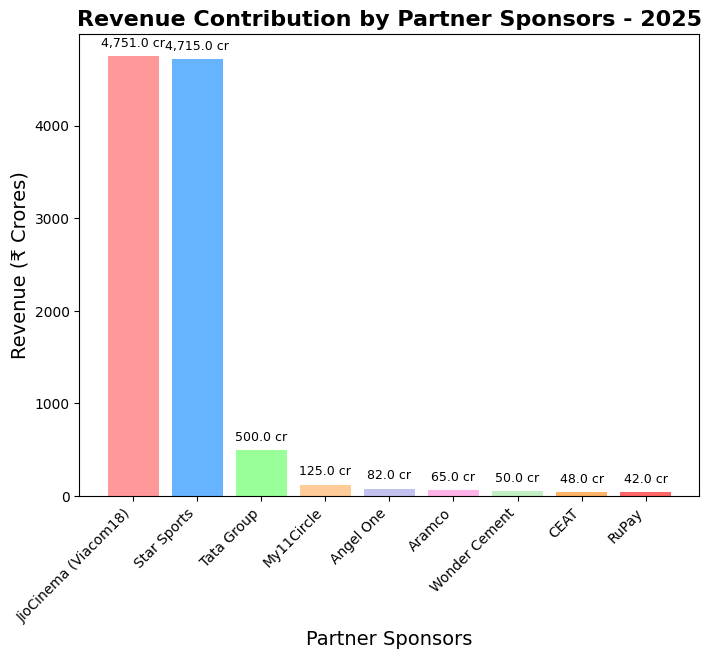

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(revenue_contributers['partner_sponsor_name'], revenue_contributers['amount_in_crores_2025'], color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb366','#ff6666'])

plt.ylabel("Revenue (₹ Crores)", fontsize=14)
plt.xlabel("Partner Sponsors", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title("Revenue Contribution by Partner Sponsors - 2025", fontsize=16, fontweight='bold')

for index, value in enumerate(revenue_contributers['amount_in_crores_2025']):
    plt.text(index, value + 100, f"{value:,.1f} cr", fontsize=9, ha='center')

plt.show()

## 3. Health / Social Risk Index for Advertisers

In [5]:

#converting the qualitative data to quantitative index
risk_mapping = {'Extremely High - Carcinogenic (Surrogate Ads)': 10, 'Extremely High - Promotes Gambling': 9, 'Carcinogenic (Surrogate Ads)': 10,
                'Moderate  (Sugar Content)': 5, 'Low ': 1}

df_advertisers['risk_index'] = df_advertisers['health_social_risk'].map(risk_mapping)

risk_df = df_advertisers[['advertiser_brand', 'category', 'risk_index']].sort_values('risk_index', ascending=False).reset_index()
display(risk_df)

,index,advertiser_brand,category,risk_index
0,0,Vishnu Packaging (Vimal Elaichi),Pan Masala/Mouth Freshener,10
1,4,Rajshree Silver Coated Elaichi,Pan Masala/Mouth Freshener,10
2,6,Kamla Pasand,Pan Masala/Mouth Freshener,10
3,1,Sporta Technologies (Dream11),Fantasy Gaming / Betting,9
4,7,PokerBaazi,Fantasy Gaming / Betting,9
5,3,My11Circle,Fantasy Gaming / Betting,9
6,5,Parle Biscuits,FMCG (Biscuits & Snacks),5
7,2,Reliance Consumer Products,FMCG / Beverages,5
8,8,Britannia 50-50,FMCG (Biscuits & Snacks),5
9,9,Amazon Prime,OTT/Entertainment,1


## 4. CAGR Calculation for Top 5 High-Risk Brands

In [6]:
df_revenue_demo.at[3, 'parent'] = 'KR Group'
df_revenue_demo.at[4, 'parent'] = 'DS Group'
df_revenue_demo.at[5, 'parent'] = 'DS Group'

vimal_panmasala = 1328 # 80% of KR Group's revenue 1660 cr
kamla_pasand = 882.25 # 25% of DS Group's pan masala revenue 3529 cr (67% of FY24 revenue 5267 cr)
Rajshree = 617.5 # 17.5% of DS Group's pan masala revenue 3529 cr

dream11 = 5107.2 # 20% dip in revenue from FY23 (Sector's revenue fell to 8,800 cr in FY24 from 11,000 cr in FY23)
pokerbaazi = 352.75 # 85% of parent company's revenue 415 cr
my11circle = 566.45 # 20% dip in revenue from FY23 708.05 cr ~35% of parent company's revenue 2,023 cr

df_revenue_demo['FY24_revenue'] = [dream11, pokerbaazi, my11circle, vimal_panmasala, kamla_pasand, Rajshree]
df_revenue_demo['FY22_revenue'] = [3841, 70.55, 404.74, 1080, 800, 560]

df_revenue_demo['CAGR'] = round((((df_revenue_demo['FY24_revenue']/ df_revenue_demo['FY22_revenue'])**(1/2))-1), 2)
df_revenue_demo.at[1, 'CAGR'] = (df_revenue_demo['CAGR'][0] + df_revenue_demo['CAGR'][2])/ 2
df_revenue_demo['Projected_revenue_FY30'] = round(df_revenue_demo['FY22_revenue']*(1 + df_revenue_demo['CAGR'])**8, 0)
df_revenue_demo.at[1, 'Projected_revenue_FY30'] = round(352.75*(1 + .165)**6, 0) # Adjusted to market realities by averaging the CAGR of other two companies in the segment
df_revenue_demo['CAGR'] = df_revenue_demo['CAGR']*100
display(df_revenue_demo)

,company,sector,parent,latest_annual_revenue,age_group,income_group,urban_population,demographic_notes,Demographic Notes,FY24_revenue,FY22_revenue,CAGR,Projected_revenue_FY30
0,Dream11,Fantasy/App,Dream Sports,"6,384 (FY23)","20 to 35 (core), also 18 to 40+",Middle & Upper-middle,Urban & Tier 2/3 cities,77% male; strong in Tier 2/3; wide sports inte...,https://entrepreneurs to day.in/a-look-at-drea...,5107.20,3841.00,15.0,11750.0
1,PokerBaazi,Fantasy/App,Moonshine Technology,415 (FY24),"25 to 34 (largest), 18 to 44",Middle & Upper-middle,Urban-centric,"68% male; tech-savvy, young professionals",NaN,352.75,70.55,16.5,882.0
2,My11Circle,Fantasy/App,Games24x7,"2,000- 2,500 (FY23, est.)","25 to 34 (core), 18+",Middle & Upper-middle,"Urban, Tier 2/3, Rural",81% male; strong in Tier 2/3; pan-India reach;...,https://www.socialsamosa.com/interviews/saroj-...,566.45,404.74,18.0,1521.0
3,Vimal Pan Masala,Pan Masala,KR Group,"5,267 (FY24, group)","18 to 40 (core), 15 to 50+","Lower, Middle, Upper-middle",Urban & Rural,Mass-market; all socioeconomic groups; popular...,https://www.cus to mmarketinsights.com/report/...,1328.00,1080.00,11.0,2489.0
4,Kamla Pasand,Pan Masala,DS Group,Not disclosed (large player),"18 to 40 (core), 15 to 50+","Lower, Middle, Upper-middle",Urban & Rural,Similar to Vimal; strong in North/Central Indi...,https://www.cus to mmarketinsights.com/report/...,882.25,800.00,5.0,1182.0
5,Rajshree,Pan Masala,DS Group,Not disclosed,"18 to 40 (core), 15 to 50+","Lower, Middle",Urban & Rural,Focus on affordable/non-premium segment; stron...,https://www.globalgrowthinsights.com/market-re...,617.50,560.00,5.0,827.0


In [7]:
mapping_dictionary = {'Sporta Technologies (Dream11)': 'Dream11', 'Vishnu Packaging (Vimal Elaichi)': 'Vimal Pan Masala', 'Rajshree Silver Coated Elaichi': 'Rajshree'}
df_revenue_demo['company'] = df_revenue_demo['company'].replace(mapping_dictionary)
df_advertisers['advertiser_brand'] = df_advertisers['advertiser_brand'].replace(mapping_dictionary)

#Merging both df_revenue_demo and df_advertisers tables.
df_merged = pd.merge(df_revenue_demo, df_advertisers, left_on = 'company', right_on = 'advertiser_brand', how = 'inner')
top5_high_risk = df_merged.sort_values('risk_index', ascending=False).head(5)
display(top5_high_risk[['company', 'risk_index', 'FY22_revenue', 'FY24_revenue', 'Projected_revenue_FY30', 'CAGR']])

,company,risk_index,FY22_revenue,FY24_revenue,Projected_revenue_FY30,CAGR
4,Kamla Pasand,10,800.00,882.25,1182.0,5.0
3,Vimal Pan Masala,10,1080.00,1328.00,2489.0,11.0
5,Rajshree,10,560.00,617.50,827.0,5.0
0,Dream11,9,3841.00,5107.20,11750.0,15.0
1,PokerBaazi,9,70.55,352.75,882.0,16.5


## 5. Population Negatively Impacted by High-Risk Brands

In [8]:
fantasy_gaming_users = 200 # in million being optimistic and selecting high range from 130 - 200 mn (sum of upper-middle & middle class)
pan_masala_users = 120 # in million being optimistic and adjusted to market reality 113 mn - average of all three categories
df_merged['estimated_users(in millions)'] = [200*0.75, 200*0.025, 200*0.075, 120*0.07, 120*0.08, 120*0.1]
df_merged['est_neg_impacted_users(in mn)'] = [150*0.05, 5*0.05, 15*0.05, 8.4*0.28, 9.6*0.28, 12*0.28] # through some research arrived to 28% and 5% for pan_masala_users and fantasy_gaming_users respectively
affected_users = df_merged[['company', 'estimated_users(in millions)', 'est_neg_impacted_users(in mn)']]
display(affected_users)
print(f"Estimated Total Users: {int(df_merged['estimated_users(in millions)'].sum())} million users")
print(f'Estimated Total Population Negatively Impacted: {int(df_merged['est_neg_impacted_users(in mn)'].sum())} million (8% of Total Users)')

,company,estimated_users(in millions),est_neg_impacted_users(in mn)
0,Dream11,150.0,7.500
1,PokerBaazi,5.0,0.250
2,My11Circle,15.0,0.750
3,Vimal Pan Masala,8.4,2.352
4,Kamla Pasand,9.6,2.688
5,Rajshree,12.0,3.360


Estimated Total Users: 200 million users
Estimated Total Population Negatively Impacted: 16 million (8% of Total Users)


## 6. Top 5 Celebrities Promoting High-Risk Brands

In [9]:
celebs = df_advertisers['brand_ambassadors'].unique()
celebs

array(['Shah Rukh Khan, Ajay Devgn, Akshay Kumar',
       'Rohit Sharma, Aamir Khan, Ranbir Kapoor, Varun Dhawan, Hardik Pandya, others',
       'multiple',
       'Sourav Ganguly, Shubman Gill, Mohammed Siraj, Ruturaj Gaikwad, Rinku Singh, Yashasvi Jaiswal',
       'Salman Khan', 'Ananya Panday, Lakshya (Hide & Seek)',
       'Virender Sehwag, Sunil Gavaskar (2025), previously Ranveer Singh, Amitabh Bachchan',
       'Shahid Kapoor', 'Varun Dhawan, Alia Bhatt'], dtype=object)

In [10]:
Rank = [1, 2, 3, 4, 5]
top5_celebs = pd.DataFrame(Rank)
top5_celebs['brand_ambassadors'] = ['Ajay Devgn', 'Shah Rukh Khan', 'Tiger Shroff', 'Shahid Kapoor', 'Shubman Gill and Sourav Ganguly']
top5_celebs['Brands'] = ['Vimal Elaichi, Junglee Rummy', 'Vimal Elaichi', 'Vimal Elaichi', 'PokerBaazi', 'My11Circle']
top5_celebs['No. of Brands'] = [2, 1, 1, 1, 1]
display(top5_celebs)

,0,brand_ambassadors,Brands,No. of Brands
0,1,Ajay Devgn,"Vimal Elaichi, Junglee Rummy",2
1,2,Shah Rukh Khan,Vimal Elaichi,1
2,3,Tiger Shroff,Vimal Elaichi,1
3,4,Shahid Kapoor,PokerBaazi,1
4,5,Shubman Gill and Sourav Ganguly,My11Circle,1
